House Rent Prediction Dataset
This Dataset contains information about 4700+ Houses available for Renting

Kaggle Link: https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset?select=House_Rent_Dataset.csv

In [7]:
import pandas as pd
import plotly.express as px
import numpy as np
import cut_the_tails as ct
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [8]:
df = pd.read_csv('data_sets\\House_Rent_Dataset.csv')
target = 'Rent'

In [9]:
features = ['BHK',
 'Size',
 'Area Type',
 'Furnishing Status',
 'Tenant Preferred',
 'Bathroom',
 'Point of Contact',
 'City',
 ]

In [10]:
fig = px.histogram(df, x=target, nbins=400)
fig.show()

# Pré-Processamento

In [11]:
#dropping some columns
#the Area Locality and Floor columns are dropped because they generate too many new columns by onehot encoding

df.drop('Floor', axis=1, inplace=True)
df.drop('Area Locality', axis=1, inplace=True)
df.drop('Posted On', axis=1, inplace=True)

#the columns that have nominal attributes
nominal_atts = ['City', 'Area Type', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']

#using the one hot encoder
one = OneHotEncoder()

transformer = make_column_transformer((OneHotEncoder(sparse_output=False), nominal_atts), remainder='passthrough')

transformed = transformer.fit_transform(df)

transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())

# Updating the features list
features = transformer.get_feature_names_out().tolist()
target = 'remainder__Rent'
features.remove(target)

# Cauda Ótima

ValueError: Found array with 0 sample(s) (shape=(0, 21)) while a minimum of 1 is required by DecisionTreeRegressor.

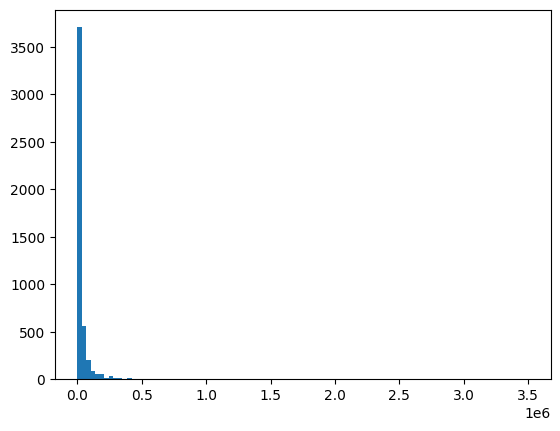

In [13]:
df.dropna(inplace=True)
df = df.reset_index(drop=True)

model = DecisionTreeRegressor(random_state=0, max_depth=5) 
classifier = DecisionTreeClassifier(random_state=0, max_depth=5)

optimal = ct.get_optimal_percentiles(transformed_df, target, features, classifier, model, 'normal', 'brute-force', 1)

print(optimal)

In [370]:
cdf = ct.split_by_quantile_class(transformed_df,target,[0.0,0.5])

In [371]:
X = cdf[features].to_numpy()
y_tail = cdf['tail_class'].to_numpy()
y = cdf[target].to_numpy()

###Using split###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train_aux, X_test_aux, y_train_tail, y_test_tail = train_test_split(X, y_tail, test_size=0.2, random_state=0)

In [372]:
#baseline = RandomForestRegressor(max_depth=5, random_state=0)
baseline = XGBRegressor(n_estimators=100, max_leaves=0, random_state = 0)
#baseline = DecisionTreeRegressor(random_state=0, max_depth=5) 

In [373]:
#tail_classifier = ct.fit_tail_classifier(X,y_tail,RandomForestClassifier(max_depth=5, random_state=0))
#tail_classifier = ct.fit_tail_classifier(X,y_tail,XGBClassifier(n_estimators=100, max_leaves=0, random_state = 0))
#tail_classifier = ct.fit_tail_classifier(X,y_tail,DecisionTreeClassifier(random_state=0, max_depth=5)) 

###Using split###
#tail_classifier = ct.fit_tail_classifier(X_train,y_train_tail,RandomForestClassifier(max_depth=5, random_state=0))
tail_classifier = ct.fit_tail_classifier(X_train,y_train_tail,XGBClassifier(n_estimators=100, max_leaves=0, random_state = 0))
#tail_classifier = ct.fit_tail_classifier(X_train,y_train_tail,DecisionTreeClassifier(random_state=0, max_depth=5)) 

In [374]:
#models = ct.fit_tail_models(X,y,y_tail,baseline)

###Using split###
models = ct.fit_tail_models(X_train,y_train,y_train_tail,baseline)

In [375]:
#baseline.fit(X,y)
#y_base = baseline.predict(X)
#y_tail = ct.batch_tail_predict(X,tail_classifier,models)

###Using split###
baseline.fit(X_train,y_train)
y_base = baseline.predict(X_test)
y_tail = ct.batch_tail_predict(X_test,tail_classifier,models)

In [376]:
#print(mean_absolute_error(y_base,y))
#print(mean_absolute_error(y_tail,y))
#print(mean_absolute_error(y,y))

###Using split###
print(mean_absolute_error(y_base,y_test))
print(mean_absolute_error(y_tail,y_test))
print(mean_absolute_error(y_test,y_test))

16056.581180355673
16121.484490517065
0.0


In [377]:
#print(mean_absolute_percentage_error(y_base,y))
#print(mean_absolute_percentage_error(y_tail,y))
#print(mean_absolute_percentage_error(y,y))

###Using split###
print(mean_absolute_percentage_error(y_base,y_test))
print(mean_absolute_percentage_error(y_tail,y_test))
print(mean_absolute_percentage_error(y_test,y_test))

0.3821506914679581
0.3951302850546576
0.0
